In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Carregando Dataset
df_colesterol = pd.read_csv('./datasets/dataset_colesterol.csv')

In [12]:
# Checando a estrutura do dataset
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         996 non-null    object 
 1   fumante                 997 non-null    object 
 2   nivel_atividade_fisica  996 non-null    object 
 3   idade                   997 non-null    float64
 4   peso                    997 non-null    float64
 5   altura                  997 non-null    float64
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [10]:
# Removendo a coluna Id pois não contém informações relevantes para a analiza
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [11]:
# Renomeando colunas
df_colesterol.columns = [
    'grupo_sanguineo',
    'fumante',
    'nivel_atividade_fisica',
    'idade',
    'peso',
    'altura',
    'nivel_colesterol'
]

In [13]:
# Copiar DF para DF EDA
df_colesterol_eda = df_colesterol.copy()

In [14]:
# Copiar DF para DF Bucketing
df_colesterol_bucketing = df_colesterol.copy()

Nesta aula, aprendemos a importância de trabalhar com nomes de colunas mais técnicos em um DataFrame. Isso facilita a referência e evita confusões com acentuação, maiúsculas e minúsculas. Aprendemos a renomear as colunas usando o atributo "columns" do DataFrame, atribuindo uma lista com os novos nomes das colunas desejadas. Também aprendemos sobre o conceito de Bucketing, que consiste em transformar variáveis numéricas em variáveis categóricas para análises específicas. Para isso, fizemos cópias do DataFrame original para trabalhar na análise exploratória e no Bucketing, deixando o DataFrame original intacto para o treinamento do modelo.

______________________________________________________________________

# Lidando com Valores Ausentes

### EDA

In [15]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [16]:
# Verificando os tipos possíveis
df_colesterol_eda.grupo_sanguineo.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [17]:
# Verificando os tipos possíveis
df_colesterol_eda.fumante.unique()

array(['Sim', 'Não', nan], dtype=object)

In [19]:
# Verificando os tipos possíveis
df_colesterol_eda.nivel_atividade_fisica.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [20]:
# Detectando valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [21]:
# Medidas estatísticas do DF
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [22]:
# Coletar medidas das variáveis categóricas
moda_grupo_sang = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade = df_colesterol_eda.nivel_atividade_fisica.mode()

In [23]:
# Coletar medidas das variáveis numéricas
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [24]:
# Imputar valores ausentes
df_colesterol_eda.fillna(value={
    'grupo_sanguineo' : moda_grupo_sang[0],
    'fumante' : moda_fumante[0],
    'nivel_atividade_fisica' : moda_nivel_atividade[0],
    'idade' : mediana_idade,
    'peso' : mediana_peso,
    'altura' : mediana_altura
}, inplace=True)

Nesta aula, discutimos sobre a escolha adequada de medidas estatísticas para tratar valores ausentes em um DataFrame. Primeiramente, analisamos as medidas estatísticas das variáveis numéricas, como idade, peso e altura, e identificamos possíveis outliers. Em seguida, concluímos que a mediana seria uma escolha mais adequada para tratar valores ausentes, pois ela é menos sensível a outliers. Para as variáveis categóricas, utilizamos a moda, ou seja, o valor mais frequente da base. Demonstramos como realizar a imputação desses valores ausentes no DataFrame, coletando as medidas estatísticas e preenchendo os valores de uma vez só. Por fim, ressaltamos a importância de verificar o domínio dos tipos possíveis das variáveis categóricas e a necessidade de converter as variáveis numéricas para o tipo adequado.

__________________________________________________________________

# Convertendo Variáveis Numéricas

In [25]:
# Convertendo variáveis numéricas para inteiro
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [26]:
# Estrutura do DF
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int64  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [27]:
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


Nesta aula, aprendemos a converter os tipos de dados em um DataFrame. Primeiro, tratamos os valores ausentes para evitar erros durante a conversão. Em seguida, utilizamos o método type para alterar o tipo das variáveis. No exemplo, convertemos a idade e a altura para inteiros. É importante realizar o tratamento dos valores ausentes antes da conversão, pois isso evita erros. Ao final da aula, verificamos que o DataFrame agora possui as colunas de idade e altura como inteiros, além de ter resolvido os valores ausentes.

______________________________________________________________

# Tratamento de Outliers

<Axes: xlabel='idade'>

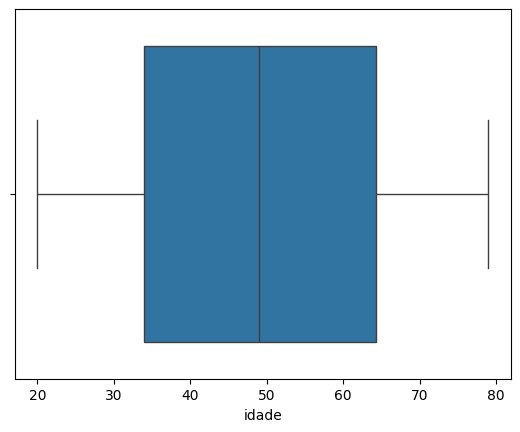

In [28]:
# Dectando Outliers
sns.boxplot(data=df_colesterol_eda, x='idade')

- Não existe valores extremos além do limite inferior e superior na variável idade

<Axes: xlabel='peso'>

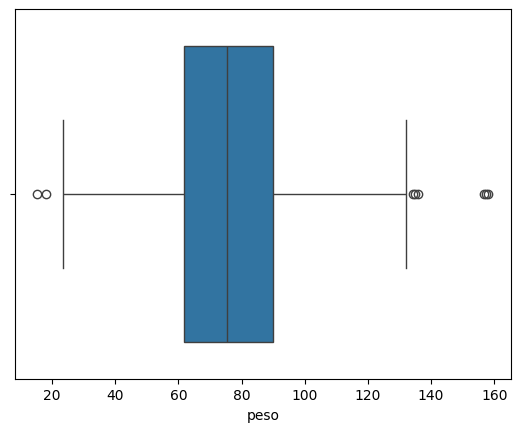

In [29]:
sns.boxplot(data=df_colesterol_eda, x='peso')

- Na variável peso é possível verificar outliers, tanto no limite inferior, quanto no limite superior

In [30]:
# Filtrar o público a ser removido, pessoas com menos de 40 kg
df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

np.int64(37)

- 37 pessoas tem o peso abaixo de 40 kg
- Essas pessoas serão removidas do DF

In [31]:
# Remover público do DF
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, axis=0, inplace=True)

<Axes: xlabel='altura'>

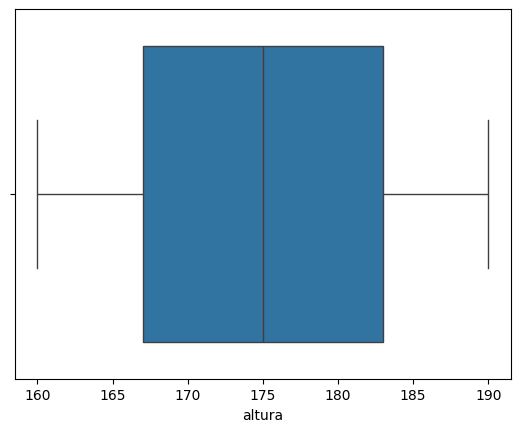

In [32]:
sns.boxplot(data=df_colesterol_eda, x='altura')

- Na variável altura não temos nenhum outlier

<Axes: xlabel='nivel_colesterol'>

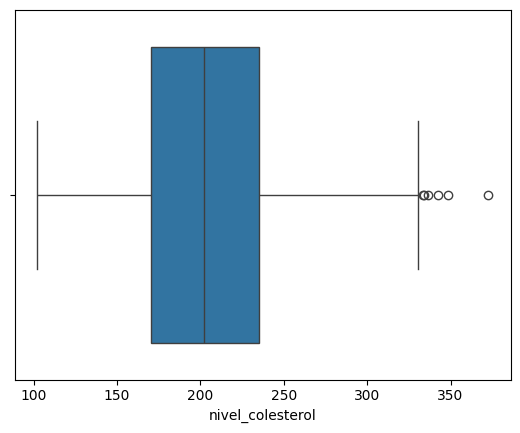

In [33]:
sns.boxplot(data=df_colesterol_eda, x='nivel_colesterol')

Nesta aula, vamos começar a análise dos dados que já foram preparados. Vamos focar na identificação de outliers, começando pela variável de peso. Utilizaremos um boxplot para visualizar os outliers e decidir se devemos removê-los. Em seguida, faremos o mesmo para a variável de altura e nível de colesterol. Verificamos que não há outliers na altura, mas há valores extremos no nível de colesterol, que decidimos manter no estudo. Em seguida, filtramos as pessoas com peso abaixo de 40 quilos, considerando que esses dados podem ter sido inseridos incorretamente. Removemos essas pessoas do DataFrame e reduzimos o público do estudo. Por fim, verificamos novamente os boxplots e confirmamos que não há outliers na idade, mas há outliers no peso. Decidimos remover as pessoas com peso muito baixo, pois não fazem sentido dentro do contexto do estudo.

_____________________________________________________________________